# Deep Learning Mini Project
## Problem statement: Traffic sign recognition using a tkinter based GUI 

## Training the CNN model on GTSRB dataset

#### Objective: 
1. To use Convolutional Neural Networks to train a model that detects traffic signs
2. To recognise the traffic signs by classifying a test images and applying it into the model

#### Dataset used:
GTSRB, a German Traffic Sign Recognition Dataset
The images are classified into 43 classes. The training set contains 39209 labeled images and the test set contains 12630 images. 
Link: https://www.kaggle.com/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

#### Algorithm/Approach:
1. Retrieve the images and their labels
2. Convert these images into arrays to use as features for the model
3. Split the dataset into train and test dataset and convert them into one hot encoding format
4. Build up the layers of the CNN model
5. Train the model, plot accuracy graph and save it
6. Test accuracy on test dataset and calculate its accuracy, and save the classifier
7. Recognise other images by using classifier along with the tkinter GUI package

#### What is Convolution Neural Network?
Convolutional Neural Networks are a type of Deep Learning Algorithm **that take the image as an input and learn the various features of the image through filters**. 

This allows them to **learn the important objects present in the image, allowing them to discern one image from the other**. For example, the convolutional network will learn the specific features of cats that differentiate from the dogs so that when we provide input of cats and dogs, it can easily differentiate between the two. 

One important feature of Convolutional Neural Network that sets it apart from other Machine Learning algorithms is its **ability to pre-process the data by itself**. Thus, you may not spend a lot of resources in data pre-processing. 

During cold-start, the filters may require hand engineering but with progress in training, they are able to adapt to the learned features and develop filters of their own. Therefore, CNN is continuously evolving with growth in the data.

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [3]:
data = []
labels = []
classes = 43
cur_path = os.getcwd()

In [4]:
# Retrieving the images and their labels
for i in range(classes):
    path = os.path.join(cur_path, 'train', str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30, 30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

In [5]:
# Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)
print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


In [6]:
# Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [7]:
# Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43) # This function returns a matrix of binary values (either ‘1’ or ‘0’). 
y_test = to_categorical(y_test, 43)   # It has number of rows equal to the length of the input vector and number of columns 
                                      # equal to the number of classes.

In [14]:
# Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax')) # since multiclass classification

### Layers of the Sequential model:

#### Conv2D:
This layer creates a convolution kernel that is convolved with the layer input to produce a tensor of outputs.

#### MaxPool2D:
Downsamples the input representation by taking the maximum value over the window defined by pool_size for each dimension along the features axis.

#### Dropout:
Used for regularization of data. At each training stage, individual nodes are either dropped out of the net with probability 1-p or kept with probability p, so that a reduced network is left.

#### Flatten:
Flattens the output of the convolutional layers to create a single long feature vector. And it is connected to the final classification model, which is called a fully-connected layer.

#### Dense:
Dense layer is the regular deeply connected neural network layer. It is most common and frequently used layer.

In [15]:
# Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
epochs = 15
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/15
981/981 [==============================] - 119s 120ms/step - loss: 3.3968 - accuracy: 0.2772 - val_loss: 0.6834 - val_accuracy: 0.8298
Epoch 2/15
981/981 [==============================] - 117s 120ms/step - loss: 0.8710 - accuracy: 0.7424 - val_loss: 0.2339 - val_accuracy: 0.9359
Epoch 3/15
981/981 [==============================] - 116s 118ms/step - loss: 0.5160 - accuracy: 0.8480 - val_loss: 0.1759 - val_accuracy: 0.9536
Epoch 4/15
981/981 [==============================] - 111s 113ms/step - loss: 0.3410 - accuracy: 0.8970 - val_loss: 0.1367 - val_accuracy: 0.9676
Epoch 5/15
981/981 [==============================] - 112s 114ms/step - loss: 0.2828 - accuracy: 0.9179 - val_loss: 0.0736 - val_accuracy: 0.9824
Epoch 6/15
981/981 [==============================] - 107s 109ms/step - loss: 0.2320 - accuracy: 0.9333 - val_loss: 0.1084 - val_accuracy: 0.9702
Epoch 7/15
981/981 [==============================] - 103s 105ms/step - loss: 0.2314 - accuracy: 0.9345 - val_loss: 0.1043 -

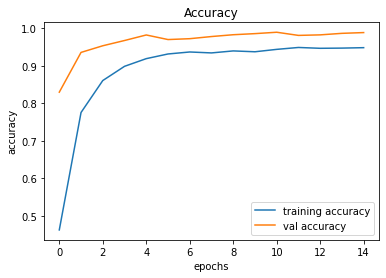

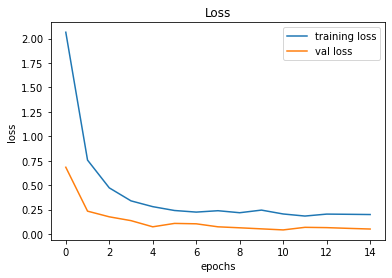

In [16]:
# Plotting graphs for accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [17]:
# Save the model
model.save("my_model.h5") 

In [21]:
# Testing accuracy on test dataset
# 1. Retrieve the test images:
y_test = pd.read_csv('Test.csv')
labels = y_test["ClassId"].values
imgs = y_test["Path"].values
data=[]
for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
X_test = np.array(data)

# 2. Predict the output for test data:
pred = np.argmax((model.predict(X_test) > 0.5).astype("int32"), axis=-1)

In [22]:
# Accuracy with the test data
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, pred))

0.948535233570863


In [23]:
# Save the model
model.save("traffic_classifier.h5")